In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Reading Dataset
dataset = pd.read_csv('US_Accidents_Dec19.csv')
dataset = dataset.iloc[0:100000,:]
dataset.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
#Shape of Dataset
dataset.shape

(100000, 49)

In [4]:
#List of columns present in Dataset
dataset.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
#Renaming few columns
dataset.rename(columns = {'Temperature(F)':'Temperature_F', 'Wind_Chill(F)':'Wind_Chill_F',  'Pressure(in)':'Pressure_in', 'Visibility(mi)':'Visibility_mi','Wind_Speed(mph)':'Wind_Speed_mph', 'Humidity(%)':'Humidity','Distance(mi)':'Distance_mi','Precipitation(in)':'Precipitation_in'}, inplace = True) 

In [6]:
#Confirming the change
dataset.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance_mi',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature_F', 'Wind_Chill_F', 'Humidity', 'Pressure_in',
       'Visibility_mi', 'Wind_Direction', 'Wind_Speed_mph', 'Precipitation_in',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [7]:
#A detailed description of the datset
dataset.describe(include='all')

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,100000,100000,100000.000000,100000.000000,100000,100000,100000.000000,100000.000000,0.0,0.0,...,100000,100000,100000,100000,100000,100000,99999,99999,99999,99999
unique,100000,2,NaN,NaN,81768,81216,NaN,NaN,NaN,NaN,...,2,2,2,2,2,1,2,2,2,2
top,A-3398,MapQuest,NaN,NaN,10-04-2016 08:59,14-10-2016 19:50,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,99949,NaN,NaN,35,24,NaN,NaN,NaN,NaN,...,99994,97481,98087,99966,91114,100000,62505,66173,70261,74320
mean,NaN,NaN,208.453460,2.448120,NaN,NaN,35.630382,-119.322772,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,18.367503,0.499931,NaN,NaN,2.101245,3.663519,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,200.000000,1.000000,NaN,NaN,32.542587,-123.813927,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,201.000000,2.000000,NaN,NaN,33.957775,-121.828468,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,201.000000,2.000000,NaN,NaN,34.168579,-118.384232,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,201.000000,3.000000,NaN,NaN,37.776682,-117.916023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Number of null values in the dataset column wise
dataset.isnull().sum()

ID                            0
Source                        0
TMC                           0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  100000
End_Lng                  100000
Distance_mi                   0
Description                   0
Number                    76897
Street                        0
Side                          0
City                          1
County                        0
State                         0
Zipcode                       7
Country                       0
Timezone                      7
Airport_Code                  7
Weather_Timestamp          1054
Temperature_F              1591
Wind_Chill_F              95678
Humidity                   1856
Pressure_in                1292
Visibility_mi              1846
Wind_Direction             1064
Wind_Speed_mph            23823
Precipitation_in          92632
Weather_

In [9]:
#Droping few columns because these columns contains null values majorly
data = dataset.drop(columns=['End_Lat','End_Lng','Number','Wind_Chill_F','Precipitation_in','Start_Time','End_Time','Start_Lat','Start_Lng','Description','Weather_Timestamp','Country'])

In [10]:
data.Side.unique()

array(['R', 'L', ' '], dtype=object)

In [11]:
#Replacing " " with NAN
data['Side'].replace(' ', np.nan, inplace= True)

In [12]:
#Droping all null values and checking
data.dropna(inplace=True)
data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Distance_mi              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Temperature_F            0
Humidity                 0
Pressure_in              0
Visibility_mi            0
Wind_Direction           0
Wind_Speed_mph           0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
d

In [13]:
#To know the amount of information we lost
data.shape

(74915, 37)

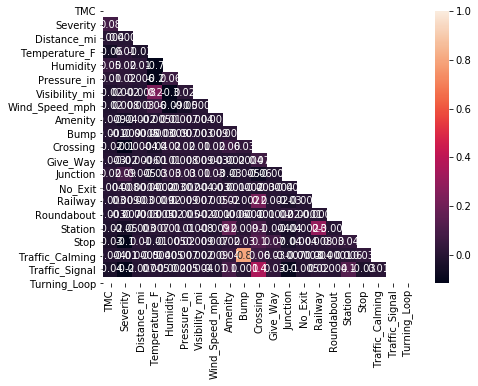

In [14]:
#Finding Correlation between variables
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(7,5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,fmt='.0g', robust=True,mask = mask)

In [15]:
#Droping highly correlated and waste features
data1 = data.drop(columns=['ID','Humidity'])
data1.columns

Index(['Source', 'TMC', 'Severity', 'Distance_mi', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code',
       'Temperature_F', 'Pressure_in', 'Visibility_mi', 'Wind_Direction',
       'Wind_Speed_mph', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
#Final Shape
data1.shape

(74915, 35)

In [17]:
#Label encoding the all the categorical feautures
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['Source', 'TMC', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code','Wind_Direction','Weather_Condition',
        'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
data1[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [18]:
#Checking the categorical features
data1.head()

,Source,TMC,Severity,Distance_mi,Street,Side,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,0,1,2,0.01,6614,1,732,8,1,165,...,0,0,0,0,1,0,1,1,0,0
3,0,1,3,0.01,3251,1,169,36,1,303,...,0,0,0,0,0,0,1,0,0,0
4,0,1,2,0.01,4165,1,169,36,1,363,...,0,0,0,0,1,0,0,0,0,0
5,0,1,3,0.01,7636,1,724,18,1,17,...,0,0,0,0,0,0,0,0,0,0
6,0,1,2,0.00,4697,1,169,36,1,309,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Number of types in Categorical variables
data1.nunique()

Source                      2
TMC                        21
Severity                    4
Distance_mi               151
Street                   7835
Side                        2
City                      758
County                     70
State                       3
Zipcode                  9633
Timezone                    2
Airport_Code              118
Temperature_F             474
Pressure_in               227
Visibility_mi              30
Wind_Direction             23
Wind_Speed_mph             62
Weather_Condition          41
Amenity                     2
Bump                        2
Crossing                    2
Give_Way                    2
Junction                    2
No_Exit                     2
Railway                     2
Roundabout                  2
Station                     2
Stop                        2
Traffic_Calming             2
Traffic_Signal              2
Turning_Loop                1
Sunrise_Sunset              2
Civil_Twilight              2
Nautical_T

In [20]:
#Slicing dataset into Independent(X) and Target(y) varibles
X = data1.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]].values
y = data1.iloc[:, 2].values

In [21]:
#Dividing dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
#Scaling the dependent variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Performing Recursive Feauture Elimation with Cross Validation
#Using Random forest for RFE-CV and accuracy as scoring
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf=RandomForestClassifier()
rfecv=RFECV(estimator=clf_rf, step=1,cv=5,scoring='accuracy')
rfecv=rfecv.fit(X_train,y_train)

C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [24]:
 #Optimal number of features
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 2
Best features : Int64Index([3, 8], dtype='int64')


In [25]:
#Feauture Ranking
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_

std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]*100))

C:\Users\saich\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 3 (30.405383)
2. feature 8 (13.925759)
3. feature 5 (6.985752)
4. feature 10 (6.465144)
5. feature 4 (6.371304)
6. feature 6 (6.157530)
7. feature 12 (5.018202)
8. feature 11 (5.016231)
9. feature 15 (3.639658)
10. feature 14 (3.487930)
11. feature 28 (2.737277)
12. feature 16 (1.851493)
13. feature 1 (1.352975)
14. feature 13 (1.193604)
15. feature 21 (0.896770)
16. feature 2 (0.880080)
17. feature 26 (0.724684)
18. feature 19 (0.512578)
19. feature 30 (0.481456)
20. feature 31 (0.364671)
21. feature 33 (0.361520)
22. feature 25 (0.340737)
23. feature 32 (0.325041)
24. feature 17 (0.151716)
25. feature 23 (0.138493)
26. feature 7 (0.108322)
27. feature 9 (0.067804)
28. feature 0 (0.014714)
29. feature 20 (0.008060)
30. feature 18 (0.006559)
31. feature 22 (0.005624)
32. feature 27 (0.002930)
33. feature 24 (0.000000)
34. feature 29 (0.000000)


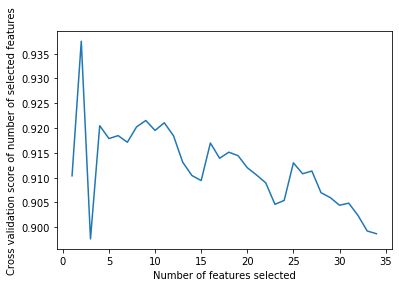

In [26]:
#Accuracy vs Number of features
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [27]:
#Selecting the Important Features

X_opt = X_train.iloc[:,[3,8,5,4,16,6,11,12,15,14,28,16,13]]
X_test = X_test.iloc[:,[3,8,5,4,16,6,11,12,15,14,28,16,13]]

In [28]:
#Training the Random Forest Classifer on Train data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_opt, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [29]:
#Predicting the Test data
y_pred = classifier.predict(X_test)

In [30]:
#Evaluation of Prediction on test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[    0    19     0     0]
 [    0 11586   768     0]
 [    0   899  9197     0]
 [    0     2     4     0]]


In [31]:
#Accuracy of the model
acs = accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
acs*100

92.47163515016685

In [32]:
from sklearn.metrics import classification_report 
c_r = classification_report(y_test,y_pred)
print(c_r)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        19
           2       0.93      0.94      0.93     12354
           3       0.92      0.91      0.92     10096
           4       0.00      0.00      0.00         6

    accuracy                           0.92     22475
   macro avg       0.46      0.46      0.46     22475
weighted avg       0.92      0.92      0.92     22475



C:\Users\saich\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
from sklearn.metrics import cohen_kappa_score 
kappa = cohen_kappa_score(y_test, y_pred)
kappa

0.8478767118950329